In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [22]:

img = cv2.imread(r'blueberry_segmentation-2\test\15-003_F2_18_21_jpg.rf.f289777165752d81a83fec82fdb8d2bc.jpg')

img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


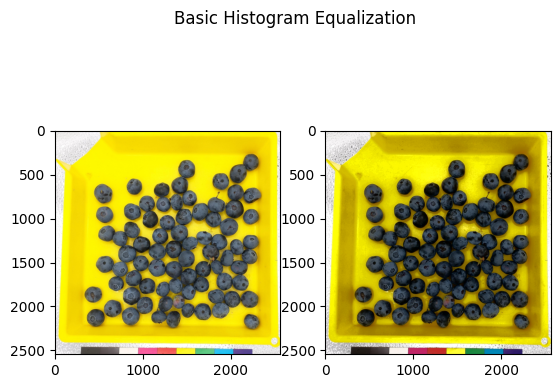

In [23]:
fig, ax = plt.subplots(1,2)
fig.suptitle('Basic Histogram Equalization')
ax[0].imshow(img)
ax[1].imshow(img_output)


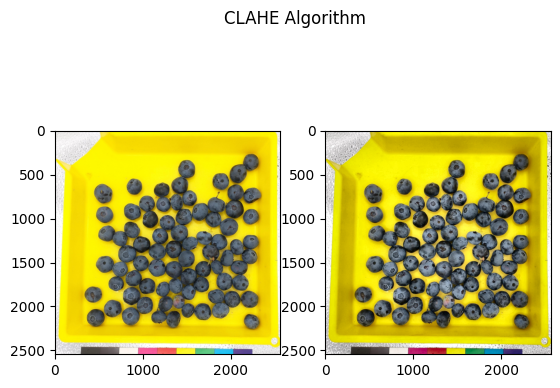

In [30]:
img_lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)

L,a,b = cv2.split(img_lab)
clahe = cv2.createCLAHE(clipLimit=2.0)
eq_L = clahe.apply(L)

img_output1 = cv2.cvtColor(cv2.merge([eq_L, a, b]), cv2.COLOR_LAB2RGB)

fig1, ax1 = plt.subplots(1,2)
fig1.suptitle("CLAHE Algorithm")
ax1[0].imshow(img)
ax1[1].imshow(img_output1)

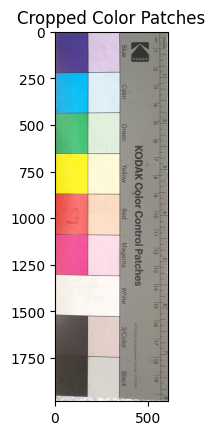

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
file_path = r"C:\Users\sasan\Downloads\NC5302_F2_14_8.jpg"
image = cv2.imread(file_path)

# Convert to grayscale for thresholding
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Since the color patches are on the right side of the image, we focus on that area
# We will define the region of interest (ROI) as the rightmost 20% of the image
height, width, _ = image.shape
roi_x_start = int(width * 0.8)
roi = gray[:, roi_x_start:width]

# Re-apply thresholding to the ROI
_, binary_roi = cv2.threshold(roi, 150, 255, cv2.THRESH_BINARY_INV)

# Find contours in the ROI
contours_roi, _ = cv2.findContours(binary_roi, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours by area and take the largest one, assuming it's the patch area
sorted_contours = sorted(contours_roi, key=cv2.contourArea, reverse=True)
patch_contour = sorted_contours[0]

# Get the bounding box of the largest contour
x, y, w, h = cv2.boundingRect(patch_contour)
x += roi_x_start  # Adjust x coordinate relative to the full image

# Crop the color patch area from the original image
color_patches_img = cv2.cvtColor(image[y:y+h, x:x+w], cv2.COLOR_BGR2RGB)

# Show the cropped color patches
plt.imshow(color_patches_img)
plt.title('Cropped Color Patches')
plt.show()


(3120, 4160, 3) (340, 1906, 3)


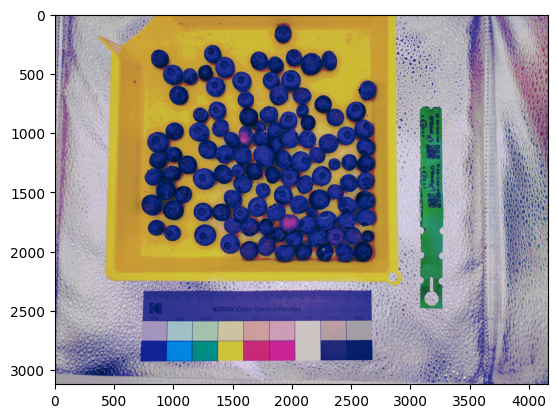

In [26]:
from skimage import exposure
import matplotlib.pyplot as plt
import cv2

source = cv2.cvtColor(cv2.imread(r"C:\Users\sasan\Downloads\H1-O_Neal_E3_7_43-48C.jpg"),cv2.COLOR_BGR2RGB)

target = cv2.cvtColor(cv2.imread(r"C:\Users\sasan\Downloads\color_patches.jpg"),cv2.COLOR_BGR2RGB)
print(source.shape,target.shape)
# Transfer color_patches_img distribution to test_img
matched = exposure.match_histograms(source,target,channel_axis=2)
plt.imshow(matched)

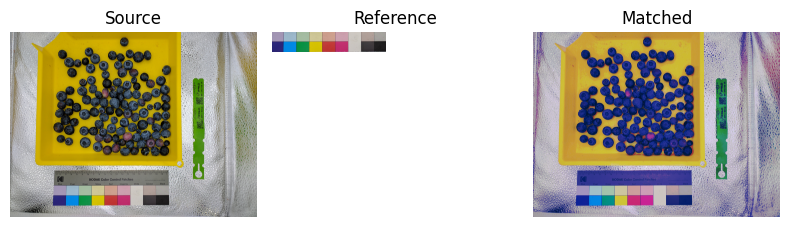

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(source)
ax1.set_title('Source')
ax2.imshow(target)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()